<a href="https://colab.research.google.com/github/a-nagar/vistra-intermediate/blob/main/ARIMA_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
!pip install yfinance

In [23]:
import yfinance as yahooFinance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

<ipython-input-23-1c9ddb035e2a>:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [24]:
GetFacebookInformation = yahooFinance.Ticker("AAPL")

In [25]:
df = GetFacebookInformation.history(period="1y")['Close']

In [26]:
df.tail()

Date
2023-10-04 00:00:00-04:00    173.660004
2023-10-05 00:00:00-04:00    174.910004
2023-10-06 00:00:00-04:00    177.490005
2023-10-09 00:00:00-04:00    178.990005
2023-10-10 00:00:00-04:00    178.389999
Name: Close, dtype: float64

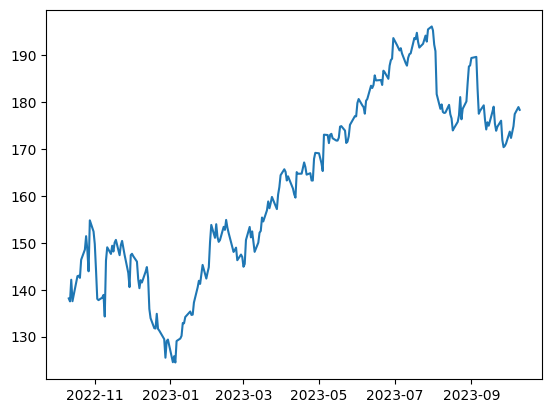

In [27]:
plt.plot(df)

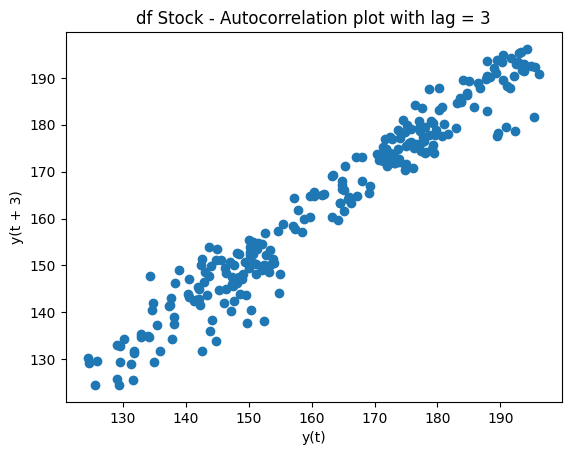

In [28]:
plt.figure()
lag_plot(df, lag=3)
plt.title('df Stock - Autocorrelation plot with lag = 3')
plt.show()

In [29]:
history = [x for x in df]
model_predictions = []
N_test_observations = len(df)

for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = df[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(df, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 13.084683238504374


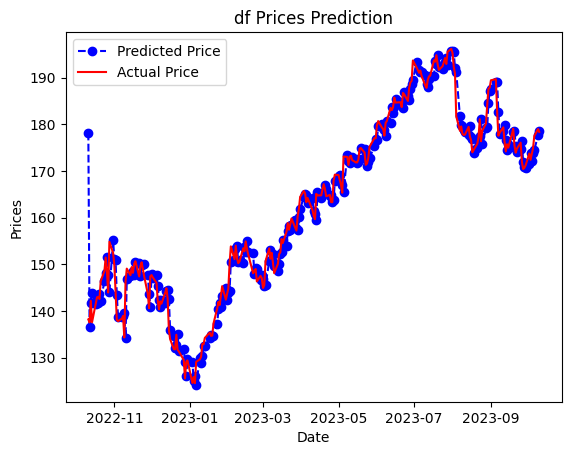

In [30]:
test_set_range = df.index


plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, df, color='red', label='Actual Price')
plt.title('df Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
#plt.xticks(np.arange(881,1259,50), df.Date[881:1259:50])
plt.legend()
plt.show()